In [48]:
import numpy as np
import seaborn as sns
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
from keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.neighbors import KNeighborsRegressor
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping
from keras.models import load_model    
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.set(rc={'figure.figsize':(7,5), 'font.size' : 8})
sns.set_style('white')
warnings.filterwarnings('ignore')
random_seed = 200

In [49]:
df = pd.read_csv('data.csv', delimiter=',')
df['Gender'] = df['Gender'].apply(lambda g: 0.0 if g == 'Male' else 1.0)
df = df[['Age', 'EnvironmentSatisfaction', 'Gender', 'NumCompaniesWorked', 'YearsWithCurrManager', 'YearsSinceLastPromotion', 'JobInvolvement', 'StockOptionLevel', 'TotalWorkingYears', 'WorkLifeBalance', 'MonthlyIncome']]
df.head(10)

,Age,EnvironmentSatisfaction,Gender,NumCompaniesWorked,YearsWithCurrManager,YearsSinceLastPromotion,JobInvolvement,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,MonthlyIncome
0,41,2,1.0,8,5,0,3,0,8,1,5993
1,49,3,0.0,1,7,1,2,1,10,3,5130
2,37,4,0.0,6,0,0,2,0,7,3,2090
3,33,4,1.0,1,0,3,3,0,8,3,2909
4,27,1,0.0,9,2,2,3,1,6,3,3468
5,32,4,0.0,0,6,3,3,0,8,2,3068
6,59,3,1.0,4,0,0,4,3,12,2,2670
7,30,4,0.0,1,0,0,3,1,1,3,2693
8,38,4,0.0,0,8,1,2,0,10,3,9526
9,36,3,0.0,6,7,7,3,2,17,2,5237


In [50]:
df.describe()

,Age,EnvironmentSatisfaction,Gender,NumCompaniesWorked,YearsWithCurrManager,YearsSinceLastPromotion,JobInvolvement,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,MonthlyIncome
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,2.721769,0.400000,2.693197,4.123129,2.187755,2.729932,0.793878,11.279592,2.761224,6502.931293
std,9.135373,1.093082,0.490065,2.498009,3.568136,3.222430,0.711561,0.852077,7.780782,0.706476,4707.956783
min,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1009.000000
25%,30.000000,2.000000,0.000000,1.000000,2.000000,0.000000,2.000000,0.000000,6.000000,2.000000,2911.000000
50%,36.000000,3.000000,0.000000,2.000000,3.000000,1.000000,3.000000,1.000000,10.000000,3.000000,4919.000000
75%,43.000000,4.000000,1.000000,4.000000,7.000000,3.000000,3.000000,1.000000,15.000000,3.000000,8379.000000
max,60.000000,4.000000,1.000000,9.000000,17.000000,15.000000,4.000000,3.000000,40.000000,4.000000,19999.000000


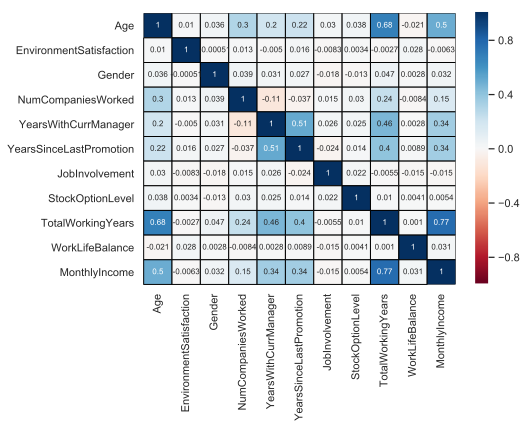

In [51]:
_ = sns.heatmap(df.corr(), cmap="RdBu", linecolor='black', linewidths = 1, vmin = -1, vmax = 1, annot = True)

In [39]:
_ = sns.pairplot(data=df, x_vars=df.columns, y_vars=['MonthlyIncome'], kind="reg", plot_kws={'scatter_kws' : {'color' : 'cyan', 's' : 15, 'alpha' : 0.2}})

In [40]:
test_precent = 0.2
train_precent = 1.0 - test_precent
train_data = df.sample(frac=train_precent, random_state=random_seed)
test_data = df.drop(train_data.index)
train_stats = train_data.describe().T
def normalize(x):
    result = x.copy()
    for feature_name in x.columns:
        average = x[feature_name].mean()
        std = x[feature_name].std()
        result[feature_name] = (x[feature_name] - average) / std
    return result
normalized_train_data = normalize(train_data)
normalized_test_data = normalize(test_data)
normalized_train_data.head()

,Age,EnvironmentSatisfaction,Gender,NumCompaniesWorked,YearsWithCurrManager,YearsSinceLastPromotion,JobInvolvement,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,MonthlyIncome
388,0.560570,-0.664784,1.231629,0.111056,-0.578001,-0.349248,0.360166,0.246447,-0.402579,0.344175,-0.810911
262,-0.527808,1.163956,-0.811242,0.510449,-0.016009,-0.666893,-1.051684,-0.931688,-0.272693,0.344175,-0.895261
904,1.213597,1.163956,-0.811242,1.309236,-1.139993,-0.666893,-1.051684,-0.931688,1.805473,1.779459,2.497510
87,1.540111,1.163956,-0.811242,0.111056,-0.297005,-0.666893,0.360166,1.424581,-0.142808,0.344175,-0.916560
1324,-0.854321,1.163956,-0.811242,2.108023,0.545983,-0.349248,-2.463533,1.424581,-0.012922,0.344175,-0.007898


In [41]:
y_label='MonthlyIncome'
train_x = normalized_train_data.drop(y_label, axis = 1)
train_y = normalized_train_data[y_label]
test_x = normalized_test_data.drop(y_label, axis = 1)
test_y = normalized_test_data[y_label]


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

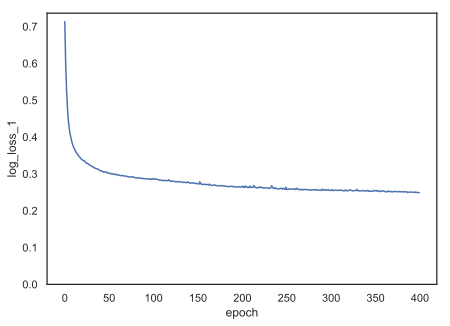

In [42]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 400


def show_history(history):
    history_df = pd.DataFrame(history.history)
    history_df['epoch'] = history.epoch
    history_df['log_loss_1'] = np.log(history_df['loss'] + 1)
    sns.lineplot(data = history_df, y='log_loss_1', x='epoch')
    plt.gca().set_ylim(bottom=0)

def nn_mse(X,y, test_X, test_y):
    inputs_len = len(X.columns)
    input1 = Input(shape=(inputs_len,))
    hidden1 = Dense(inputs_len, activation='relu')(input1)
    hidden2 = Dense(inputs_len, activation='relu')(hidden1)
    out1 = Dense(1)(hidden2)
    model = Model(inputs=input1, outputs=out1)
    model.compile(loss='mean_squared_error', optimizer='adam')
    history = model.fit(X, y, epochs=EPOCHS, verbose=0, callbacks=[PrintDot()])
    show_history(history)
    predicted = model.predict(X).flatten()
    expected = y
    train_NN_res = mean_squared_error(expected, predicted)
    predicted = model.predict(test_X).flatten()
    expected = test_y
    test_NN_res = mean_squared_error(expected, predicted)
    return train_NN_res, test_NN_res
train_NN_res, test_NN_res = nn_mse(train_x,train_y, test_x, test_y)

In [43]:
def fit_predict_mse_test(regressor, train_X, train_Y, test_X, test_Y):
    regressor.fit(train_X,train_Y)
    expected = regressor.predict(test_X)
    return mean_squared_error(expected, test_Y)
def fit_predict_mse_train(regressor, train_X, train_Y, test_X, test_Y):
    regressor.fit(train_X,train_Y)
    expected = regressor.predict(train_X)
    return mean_squared_error(expected, train_Y)

In [44]:
results_df = pd.DataFrame(columns=['Classifier', 'Test MSE'])
def predict_and_add_to_df(data_frame, name, regressor):
    return data_frame.append({'Classifier': name, 'Test MSE': fit_predict_mse_test(regressor, train_x, train_y, test_x, test_y)}, ignore_index = True)
    
#results_df = results_df.append({'Classifier': 'NN', 'MSE': nn_mse(X,y)}, ignore_index = True)
results_df = predict_and_add_to_df(results_df, 'KNN5', KNeighborsRegressor(5))
results_df = predict_and_add_to_df(results_df, 'KNN7', KNeighborsRegressor(7))
results_df = predict_and_add_to_df(results_df, 'KNN9', KNeighborsRegressor(9))
results_df = predict_and_add_to_df(results_df, 'Linear', LinearRegression())
results_df = predict_and_add_to_df(results_df, 'SVM', SVR())
results_df = predict_and_add_to_df(results_df, 'DTree2', DecisionTreeRegressor(max_depth = 2))
results_df = predict_and_add_to_df(results_df, 'DTree3', DecisionTreeRegressor(max_depth = 3))
results_df = predict_and_add_to_df(results_df, 'DTree4', DecisionTreeRegressor(max_depth = 4))
results_df = predict_and_add_to_df(results_df, 'DTree5', DecisionTreeRegressor(max_depth = 5))
results_df = results_df.sort_values(by = 'Test MSE').reset_index().drop(columns=['index'])

# Test Set

In [45]:
results_df_train = pd.DataFrame(columns=['Classifier', 'Train MSE'])
def predict_and_add_to_df_train(data_frame, name, regressor):
    return data_frame.append({'Classifier': name, 'Train MSE': fit_predict_mse_train(regressor, train_x, train_y, test_x, test_y)}, ignore_index = True)
    
results_df_train = predict_and_add_to_df_train(results_df_train, 'KNN5', KNeighborsRegressor(5))
results_df_train = predict_and_add_to_df_train(results_df_train, 'KNN7', KNeighborsRegressor(7))
results_df_train = predict_and_add_to_df_train(results_df_train, 'KNN9', KNeighborsRegressor(9))
results_df_train = predict_and_add_to_df_train(results_df_train, 'Linear', LinearRegression())
results_df_train = predict_and_add_to_df_train(results_df_train, 'SVM', SVR())
results_df_train = predict_and_add_to_df_train(results_df_train, 'DTree2', DecisionTreeRegressor(max_depth = 2))
results_df_train = predict_and_add_to_df_train(results_df_train, 'DTree3', DecisionTreeRegressor(max_depth = 3))
results_df_train = predict_and_add_to_df_train(results_df_train, 'DTree4', DecisionTreeRegressor(max_depth = 4))
results_df_train = predict_and_add_to_df_train(results_df_train, 'DTree5', DecisionTreeRegressor(max_depth = 5))
results_df_train = results_df_train.sort_values(by = 'Train MSE').reset_index().drop(columns=['index'])

#  Train Set

In [46]:
results_df['Train MSE'] = results_df_train['Train MSE']
melted_df = results_df.melt(id_vars=['Classifier'], value_vars=['Test MSE', 'Train MSE'])
melted_df.rename(columns={'variable': 'Data-Set', 'value': 'MSE'}, inplace=True)
melted_df = melted_df.append({'Classifier' : 'NN' , 'Data-Set' : 'Test MSE', 'MSE' : test_NN_res} , ignore_index=True)
melted_df = melted_df.append({'Classifier' : 'NN' , 'Data-Set' : 'Train MSE', 'MSE' : train_NN_res} , ignore_index=True)
melted_df = melted_df.sort_values(['MSE'])
melted_df

,Classifier,Data-Set,MSE
9,Linear,Train MSE,0.251861
10,DTree3,Train MSE,0.265610
11,SVM,Train MSE,0.278883
19,NN,Train MSE,0.281871
12,DTree4,Train MSE,0.282571
13,DTree2,Train MSE,0.298597
14,DTree5,Train MSE,0.348308
15,KNN7,Train MSE,0.361659
16,KNN9,Train MSE,0.379142
17,KNN5,Train MSE,0.388575


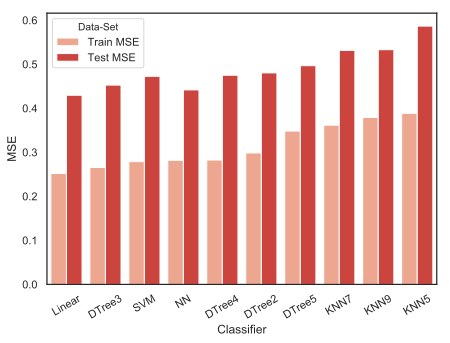

In [47]:
barplot = sns.barplot(data = melted_df, x = 'Classifier', y = 'MSE', hue = 'Data-Set', palette="Reds")
_ = barplot.set_xticklabels(barplot.get_xticklabels(), rotation=30)